## Import des bibliothèques ##

In [1]:
import networkx as nx
import numpy as np
import scipy as sp
from numpy import linalg as LA
import pandas as pd
import csv
import matplotlib.pylab as plt
import math
import json

# Question 2: Social Network Analysis with the Facebook100 Dataset #

### Import des graph ###

In [2]:
Gcaltech = nx.read_graphml("./fb100/Caltech36.graphml")
Gmit = nx.read_graphml("./fb100/Mit8.graphml")
GjohnsHopkins = nx.read_graphml("./fb100/Johns Hopkins55.graphml")

### Histogramme de la distribution en degrés de Catech ###

[1.53203856e-02 1.12138905e-02 7.05474800e-03 3.42207926e-03
 2.00060018e-03 7.37063224e-04 5.26473732e-04 1.05294746e-04
 5.26473732e-05 5.26473732e-05]


Text(0.5, 1.0, 'Degree distribution of Caltech')

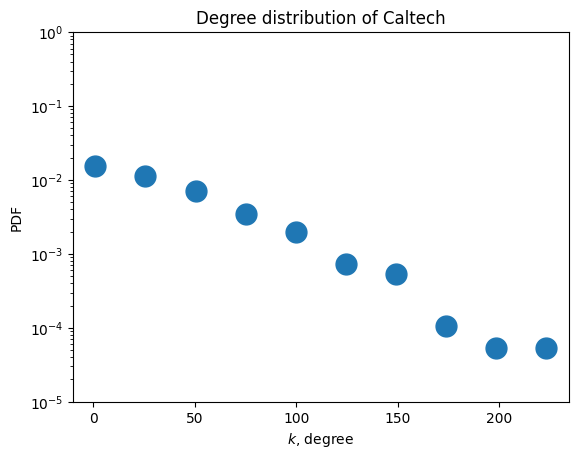

In [3]:
degree_sequence = sorted([d for n, d in Gcaltech.degree()], reverse=True)  # degree sequence
hist, bin_edges = np.histogram(degree_sequence, density=True)
print(hist)
plt.semilogy(bin_edges[:-1], hist, 'o', ms=15)
plt.xlabel(r"$k$, degree ")
plt.ylabel(r"PDF")
plt.ylim(1e-5, 1)
plt.title("Degree distribution of Caltech")

### Histogramme de la distribution en degrés du MIT ###

[8.24716456e-03 3.51849737e-03 1.47372767e-03 5.84219913e-04
 1.84490499e-04 7.90673566e-05 1.97668392e-05 1.75705237e-05
 1.31778928e-05 6.58894638e-06]


Text(0.5, 1.0, 'Degree distribution of MIT')

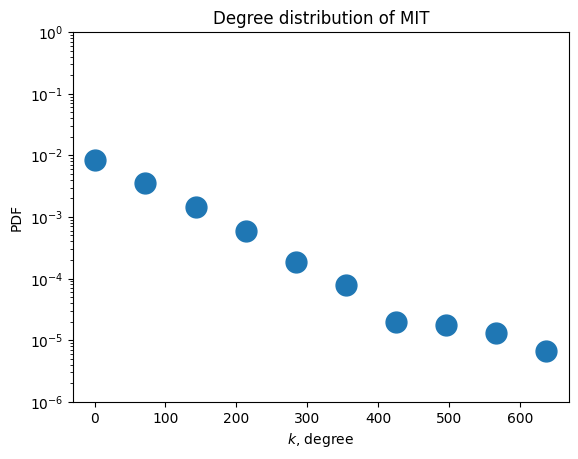

In [4]:
degree_sequence = sorted([d for n, d in Gmit.degree()], reverse=True)  # degree sequence
hist, bin_edges = np.histogram(degree_sequence, density=True)
print(hist)
plt.semilogy(bin_edges[:-1], hist, 'o', ms=15)
plt.xlabel(r"$k$, degree ")
plt.ylabel(r"PDF")
plt.ylim(1e-6, 1)
plt.title("Degree distribution of MIT")

### Histogramme de la distribution en degrés de Johns Hopkins ###

[7.81362476e-03 2.60672295e-03 6.84946448e-04 1.41788277e-04
 3.92644460e-05 8.72543245e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.36271623e-06]


Text(0.5, 1.0, 'Degree distribution of Johns Hopkins')

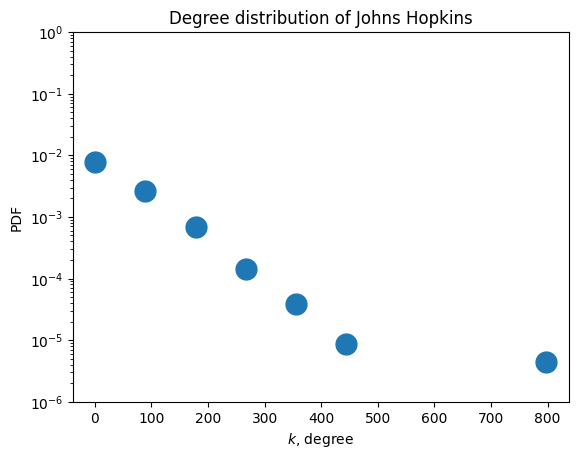

In [5]:
degree_sequence = sorted([d for n, d in GjohnsHopkins.degree()], reverse=True)  # degree sequence
hist, bin_edges = np.histogram(degree_sequence, density=True)
print(hist)
plt.semilogy(bin_edges[:-1], hist, 'o', ms=15)
plt.xlabel(r"$k$, degree ")
plt.ylabel(r"PDF")
plt.ylim(1e-6, 1)
plt.title("Degree distribution of Johns Hopkins")

### Calcul des transitivity/ global clustering coefficient ###

In [6]:
print(nx.transitivity(Gcaltech))
print(nx.transitivity(Gmit))
print(nx.transitivity(GjohnsHopkins))

0.2912826901150874
0.18028845093502427
0.19316123901594015


### Calcul des mean local clustering coefficient ###

In [7]:
print(nx.average_clustering(Gcaltech))
print(nx.average_clustering(Gmit))
print(nx.average_clustering(GjohnsHopkins))

0.40929439048517247
0.2712187419501315
0.26839307371293525


### Calcul des edges density ###

In [8]:
print(nx.density(Gcaltech))
print(nx.density(Gmit))
print(nx.density(GjohnsHopkins))

0.05640442132639792
0.012118119495041378
0.013910200162372396


### Représentation graphique des degrées des noeuds en fonction du local clustering coefficient de Caltech ###

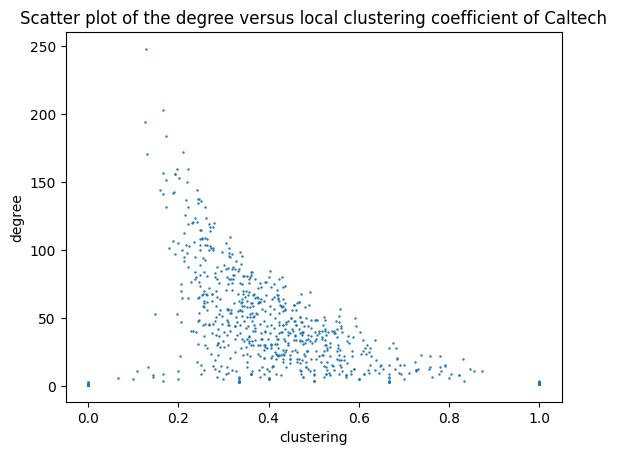

In [19]:
x,y = [],[]
for n,d in Gcaltech.degree():
    x.append(nx.clustering(Gcaltech,n))
    y.append(d)

plt.scatter(x,y,s=0.5)
plt.xlabel("clustering")
plt.ylabel("degree")
plt.title("Scatter plot of the degree versus local clustering coefficient of Caltech")
plt.show()

### Représentation graphique des degrées des noeuds en fonction du local clustering coefficient du MIT ###

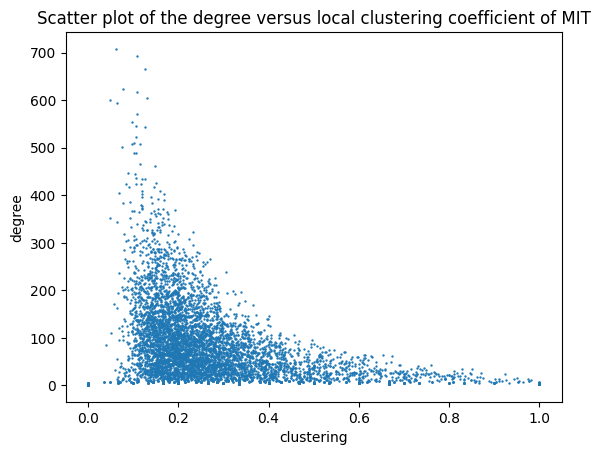

In [20]:
x,y = [],[]
for n,d in Gmit.degree():
    x.append(nx.clustering(Gmit,n))
    y.append(d)

plt.scatter(x,y,s=0.5)
plt.xlabel("clustering")
plt.ylabel("degree")
plt.title("Scatter plot of the degree versus local clustering coefficient of MIT")
plt.show()

### Représentation graphique des degrées des noeuds en fonction du local clustering coefficient de Johns Hopkins ###

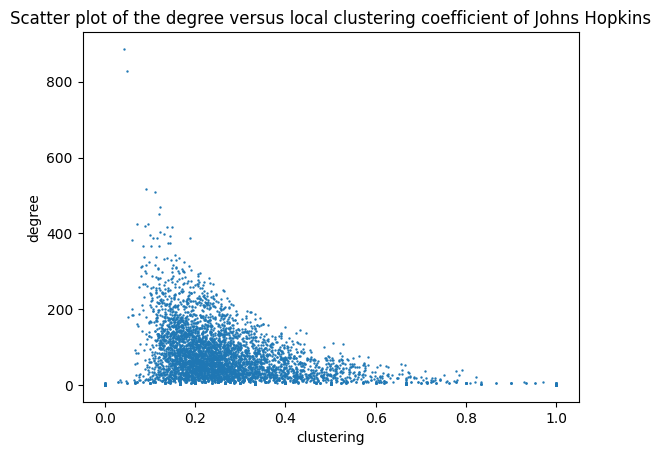

In [21]:
x,y = [],[]
for n,d in GjohnsHopkins.degree():
    x.append(nx.clustering(GjohnsHopkins,n))
    y.append(d)

plt.scatter(x,y,s=0.5)
plt.ylabel("degree")
plt.xlabel("clustering")
plt.title("Scatter plot of the degree versus local clustering coefficient of Johns Hopkins")
plt.show()

# Question 3 #

### Import de tous les diagrammes so Berkley car trop lourd pour le traitement à posteriori ###

In [2]:
import os

In [ ]:
G_dict = {}
for graph in os.listdir("./fb100"):
    if graph != "Berkeley13.graphml":
        graph_path = "./fb100/"+graph
        G_dict[graph]=nx.read_graphml(graph_path)


## Représentation graphique pour l'attribut status ##

In [ ]:
size = []
status_assortativity = []
for graph in G_dict.values():
    size.append(graph.number_of_nodes())
    status_assortativity.append(nx.attribute_assortativity_coefficient(graph,"student_fac"))
    

### Représentation graphique de l'assortivity du status en fonction de la taille des graphs ###

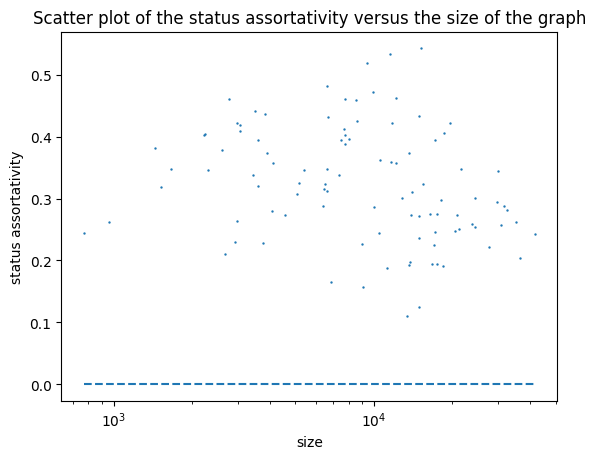

In [14]:
plt.scatter(size,status_assortativity,s=0.5)
plt.xscale("log")
plt.ylabel("status assortativity")
plt.xlabel("size")
plt.title("Scatter plot of the status assortativity versus the size of the graph")
plt.plot([min(size)+i*((max(size)-min(size))/len(size)) for i in range(len(size))],[0 for i in range(len(size))],ls="--")
plt.show()

### Histogramme de la densité de l'assortivity du status ###

[0.46717999 1.63512995 2.10230994 4.67179986 3.73743988 2.80307991
 3.50384989 2.10230994 1.40153996 0.70076998]


Text(0.5, 1.0, 'Status assortativity distribution')

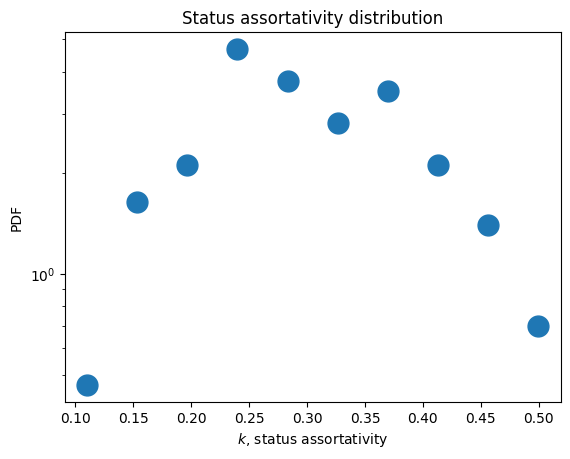

In [23]:
status_sequence = sorted(status_assortativity, reverse=True)  # degree sequence
hist, bin_edges = np.histogram(status_sequence, density=True)
print(hist)
plt.semilogy(bin_edges[:-1], hist, 'o', ms=15)
plt.xlabel(r"$k$, status assortativity ")
plt.ylabel(r"PDF")
plt.title("Status assortativity distribution")

## Représentation graphique pour l'attribut major ##

In [24]:
size = []
major_assortativity = []
for graph in G_dict.values():
    size.append(graph.number_of_nodes())
    major_assortativity.append(nx.attribute_assortativity_coefficient(graph,"major_index"))

### Représentation graphique de l'assortivity du major en fonction de la taille des graphs ###

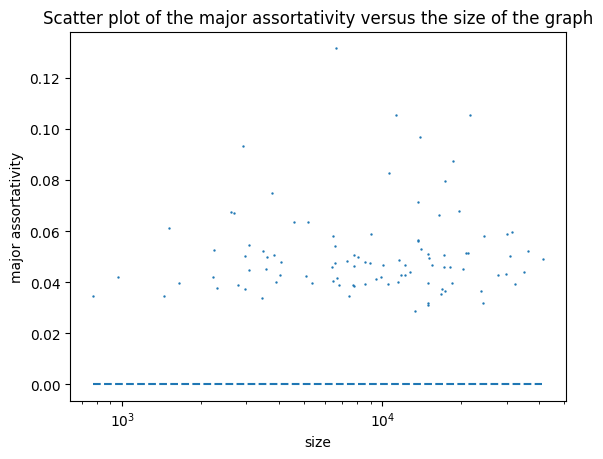

In [27]:
plt.scatter(size,major_assortativity,s=0.5)
plt.xscale("log")
plt.ylabel("major assortativity")
plt.xlabel("size")
plt.title("Scatter plot of the major assortativity versus the size of the graph")
plt.plot([min(size)+i*((max(size)-min(size))/len(size)) for i in range(len(size))],[0 for i in range(len(size))],ls="--")
plt.show()

### Histogramme de la densité de l'assortivity de l'attribut major ###

[14.69883062 42.13664776 22.53820694  7.83937633  2.93976612  1.95984408
  1.95984408  1.95984408  0.          0.97992204]


Text(0.5, 1.0, 'Major assortativity distribution')

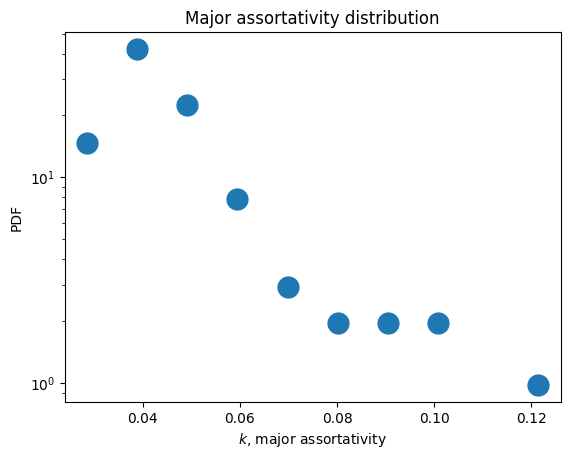

In [25]:
major_sequence = sorted(major_assortativity, reverse=True)  # degree sequence
hist, bin_edges = np.histogram(major_sequence, density=True)
print(hist)
plt.semilogy(bin_edges[:-1], hist, 'o', ms=15)
plt.xlabel(r"$k$, major assortativity ")
plt.ylabel(r"PDF")
plt.title("Major assortativity distribution")

## Représentation graphique pour l'attribut dorm ##

In [28]:
size = []
dorm_assortativity = []
for graph in G_dict.values():
    size.append(graph.number_of_nodes())
    dorm_assortativity.append(nx.attribute_assortativity_coefficient(graph,"dorm"))

### Représentation graphique de l'assortivity du dorm en fonction de la taille des graphs ###

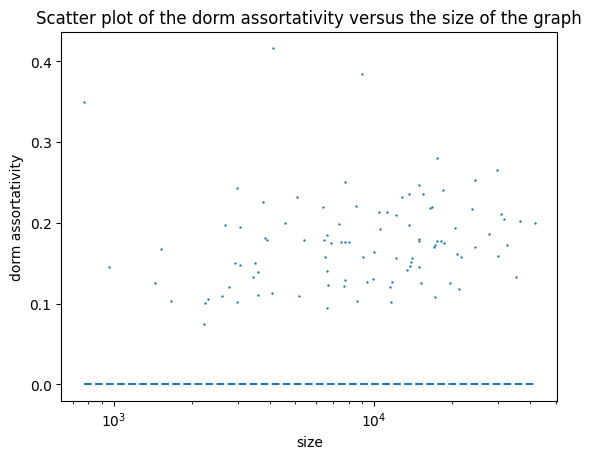

In [29]:
plt.scatter(size,dorm_assortativity,s=0.5)
plt.xscale("log")
plt.ylabel("dorm assortativity")
plt.xlabel("size")
plt.title("Scatter plot of the dorm assortativity versus the size of the graph")
plt.plot([min(size)+i*((max(size)-min(size))/len(size)) for i in range(len(size))],[0 for i in range(len(size))],ls="--")
plt.show()

### Histogramme de la densité de l'assortivity de l'attribut dorm ###

[2.96040859 5.92081717 7.69706232 5.92081717 4.44061288 1.18416343
 0.29604086 0.         0.29604086 0.59208172]


Text(0.5, 1.0, 'Dorm assortativity distribution')

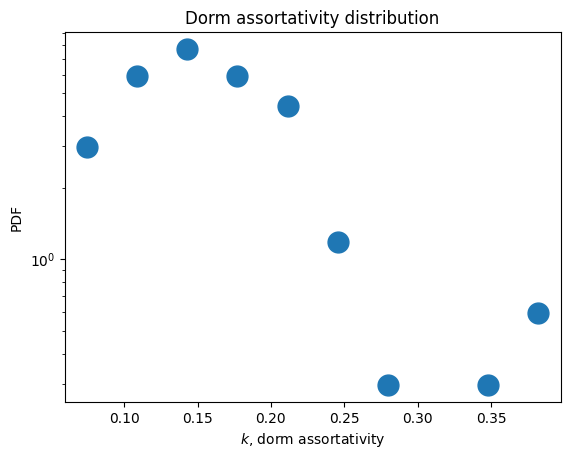

In [30]:
dorm_sequence = sorted(dorm_assortativity, reverse=True)  # degree sequence
hist, bin_edges = np.histogram(dorm_sequence, density=True)
print(hist)
plt.semilogy(bin_edges[:-1], hist, 'o', ms=15)
plt.xlabel(r"$k$, dorm assortativity ")
plt.ylabel(r"PDF")
plt.title("Dorm assortativity distribution")

# Question 4 #

## Codes pour les différentes classes ## 

In [2]:
from abc import ABC
from abc import abstractmethod 
import networkx as nx
import numpy as np
import progressbar

class LinkPrediction(ABC):
    
    def __init__(self, graph):
        """ 
        Constructor
        Parameters 
        ----------
            graph: Networkx graph 
        """
        self.graph = graph
        self.N = len(graph)
        
    def neighbors(self, v):
        """
        Return the neighbors list of a node
        Parameters 
        ---------- 
            v: int
                node id
        Return
        ------
            neighbors_list: python list 
        """
        neighbors_list = self.graph.neighbors(v) 
        return list(neighbors_list)
    
    @abstractmethod 
    def fit(self):
        raise NotImplementedError("Fit must be implemented") 
        
    
    def ind_dict(self):
        """
        Create the dictionnary corresding to the bijection of the score matrix into a flatten vector
        """
        self.ind_dict = {}
        for i in range(len(self.score)):
            for j in range(len(self.score)):
                self.ind_dict[i*len(self.score)+j]=(str(i),str(j))
                
    def sorted_score_index(self):
        """
        Create the sorted index vector of the flattening of the score matrix
        """
        sorted_score = self.score.flatten()
        self.sorted_index = sorted_score.argsort()
        
        
        
class CommonNeighbors(LinkPrediction):
    def __init__(self, graph):
        super(CommonNeighbors , self).__init__(graph)
        
    def fit(self):
        """
        Return a numpy.array S where S[i][j] = Common Neighbors that i and j have in common
        Return
        ------
            S : numpy array
        """
        self.score = np.zeros((self.N,self.N))
        for i in range(self.N):
            for j in range(i,self.N):
                
                if i != j:
                    tmp_score = 0
                    i_neighbors = self.neighbors(str(i))
                    j_neighbors = self.neighbors(str(j))

                    for n_i in i_neighbors:
                        for n_j in j_neighbors:
                            if n_i == n_j:
                                tmp_score += 1
                                continue

                    self.score[i][j]=tmp_score
                    self.score[j][i]=tmp_score
        

class Jaccard(LinkPrediction):
    def __init__(self, graph):
        super(Jaccard , self).__init__(graph)
        
    def fit(self):
        """
        Return a numpy.array S where S[i][j] = Jaccard Score for the pair (i,j)
        Return
        ------
            S : numpy array
        """
        self.score = np.zeros((self.N,self.N))
        for i in range(self.N):
            for j in range(i,self.N):
                if i != j:
                    tmp_common_n = 0
                    i_neighbors = self.neighbors(str(i))
                    j_neighbors = self.neighbors(str(j))
                    tmp_n = len(j_neighbors)

                    for n_i in i_neighbors:
                        for n_j in j_neighbors:
                            if n_i == n_j:
                                tmp_common_n += 1
                                continue
                        tmp_n+=1

                    self.score[i][j]=tmp_common_n/tmp_n
                    self.score[j][i]=tmp_common_n/tmp_n
        
            
    
class Adamic_Adar(LinkPrediction):
    def __init__(self, graph):
        super(Adamic_Adar , self).__init__(graph)
        
    def fit(self):
        """
        Return a numpy.array S where S[i][j] = Adamic Adar Score for the pair (i,j)
        Return
        ------
            S : numpy array
        """
        self.score = np.zeros((self.N,self.N))
        for i in range(self.N):
            for j in range(i,self.N):
                if i != j:
                    tmp_common_n = []
                    i_neighbors = self.neighbors(str(i))
                    j_neighbors = self.neighbors(str(j))
                    tmp_score = 0

                    for n_i in i_neighbors:
                        for n_j in j_neighbors:
                            if n_i == n_j:
                                tmp_common_n.append(len(self.neighbors(n_i)))
                                continue
                    
                    tmp_score=np.sum(1/np.log(np.array(tmp_common_n)))


                    self.score[i][j]=tmp_score
                    self.score[j][i]=tmp_score
            

In [4]:
def remove_fraction(fraction,graph):
    """
    Return the list of removed edges from a graph with a fraction of 'fraction'
    Parameters
    ----------
        fraction: float
            fraction of edges we want to remove
        graph : networkx graph
            graph on which we want to remove edges
    Return
    ------
        removed_edges : list
    """
    edges = [e for e in graph.edges()]
    nb_edges = len(edges)
    removed_edges = []
    
    for i in range(math.floor(fraction*nb_edges)):
        r = np.random.randint(nb_edges)

        while edges[r] in removed_edges:
            r = np.random.randint(nb_edges)

        removed_edge = edges[r]
        removed_edges.append(removed_edge)
    return removed_edges

In [5]:
def get_top_pair_k(predictor_graph,k):
    """
    Return the list of the top k pair of a predicted graph
    Parameters
    ----------
        predictor_graph: Link_predictor
            predicted graph on which we want to get the top k pair
        k : int
            number of pair we want 
    Return
    ------
        k_highest_score_pair : list
    """
    k_highest_score = predictor_graph.sorted_index[len(predictor_graph.sorted_index)-k:]
    k_highest_score_pair = [predictor_graph.ind_dict[p] for p in k_highest_score]
    return k_highest_score_pair

In [6]:
def metrics_dict(removed_edges,k_highest_score_pair):
    """
    Return a metrics dictionnay with the number of interraction between the removed edges and the k highest score pair
    the dictionnary contains also the top@k, precision@k and reacall@k 
    Parameters
    ----------
        removed_edges: list
            list of removed edges from a graph
        k_highest_score_pair : list
            list of the top k pair of a predicted graph
    Return
    ------
        metrics : dictionnary
    """
    nb_inter = 0
    for p in removed_edges:
        for q in k_highest_score_pair:
            if p==q:
                nb_inter+=1
                
    metrics = {}
    metrics["nb_inter"] = nb_inter
    metrics["top_k"] = nb_inter/len(k_highest_score_pair)
    metrics["precision_k"] = nb_inter/len(k_highest_score_pair)
    metrics["recall_k"] = nb_inter/len(removed_edges)
    
    return metrics           

In [7]:
def predictor_metrics(graph):
    """
    Return a metrics dictionnay for each fraction, k and different predictors of a graph
    Parameters
    ----------
        graph: networkx graph
            graph on which we want to get the metrics
    Return
    ------
        metrics : dictionnary
    """
    E_predict = {}
    
    for predictor in ["CommonNeighbors","Jaccard","Adamic_Adar"]:
        if predictor == "CommonNeighbors":
            pred = CommonNeighbors(graph)
        elif predictor == "Jaccard":
            pred = Jaccard(graph)
        elif predictor == "Adamic_Adar":
            pred = Adamic_Adar(graph)
        pred.fit()
        pred.ind_dict()
        pred.sorted_score_index()
        E_predict[predictor]=pred
        
    metrics = {}
    
    for fraction in [0.05,0.1,0.15,0.2]:
        metrics[str(fraction)] = {}
        for k in [i*50 for i in range(1,9)]:
            metrics[str(fraction)][str(k)] = {}
            removed_edges = remove_fraction(fraction,graph)
            for predictor in ["CommonNeighbors","Jaccard","Adamic_Adar"]:
                k_highest_score_pair = get_top_pair_k(E_predict[predictor],k)
                metrics[str(fraction)][str(k)][predictor] = metrics_dict(removed_edges,k_highest_score_pair)
            
    return metrics

### Acquisition du dictionnaire de metric pour Caltech ####

In [53]:
path_graph = "./fb100/Caltech36.graphml"
graph = nx.read_graphml(path_graph)

Caltech_metrics = predictor_metrics(graph)

In [54]:
print(json.dumps(Caltech_metrics,indent=4))

{
    "0.05": {
        "50": {
            "CommonNeighbors": {
                "nb_inter": 1,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.001201923076923077
            },
            "Jaccard": {
                "nb_inter": 3,
                "top_k": 0.06,
                "precision_k": 0.06,
                "recall_k": 0.003605769230769231
            },
            "Adamic_Adar": {
                "nb_inter": 1,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.001201923076923077
            }
        },
        "100": {
            "CommonNeighbors": {
                "nb_inter": 5,
                "top_k": 0.05,
                "precision_k": 0.05,
                "recall_k": 0.006009615384615385
            },
            "Jaccard": {
                "nb_inter": 1,
                "top_k": 0.01,
                "precision_k": 0.01,
                "recall_k": 0.001201923076923

### Acquisition du dictionnaire de metric pour Hamilton ####

In [8]:
path_graph = "./fb100/Hamilton46.graphml"
graph = nx.read_graphml(path_graph)

Hamilton_metrics = predictor_metrics(graph)

In [11]:
print(json.dumps(Hamilton_metrics,indent=4))

{
    "0.05": {
        "50": {
            "CommonNeighbors": {
                "nb_inter": 1,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.00020751193193608634
            },
            "Jaccard": {
                "nb_inter": 3,
                "top_k": 0.06,
                "precision_k": 0.06,
                "recall_k": 0.0006225357958082589
            },
            "Adamic_Adar": {
                "nb_inter": 1,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.00020751193193608634
            }
        },
        "100": {
            "CommonNeighbors": {
                "nb_inter": 1,
                "top_k": 0.01,
                "precision_k": 0.01,
                "recall_k": 0.00020751193193608634
            },
            "Jaccard": {
                "nb_inter": 1,
                "top_k": 0.01,
                "precision_k": 0.01,
                "recall_k": 0.00020751

# Question 5 #

In [2]:
def fisher_yates(arr):
    """
    Return a randomly swaped array
    Parameters
    ----------
        arr: array
            array we want to randomly swap
    """
    # YOUR CODE HERE
    n = len(arr)
    for i in range(n-1,1,-1):
        j = np.random.randint(0,i)
        ai_i = arr[i]
        #print(ai_i, "swaped with", arr[j])
        arr[i] = arr[j]
        arr[j] = ai_i
        #print(arr)

In [3]:
def lpa(G, label, max_iter=100):
    """
    Return a prediction of the value of all the nodes
    Parameters
    ----------
        G: networkx graph
            graph on which we want to get the metrics
        label : string
            label on which we want to make the propagation
    Return
    ------
        labels : dictionnary
    """
    
    # Dictionnaire de label
    labels = nx.get_node_attributes(G,label)
    
    # Dictionnaire des noeuds avec des labels
    labels_l = {n:m for n,m in labels.items() if m!=0}
    # Dictionnaire de noeuds sans label (valeur à 0)
    labels_ut = {n:m for n,m in labels.items() if m==0}
    
    
    
    ## We load the list of the nodes in G
    new_ordered_node_list = list(labels_ut.keys())
    ## we randomly shuffle the list of nodes thanks to fishet_yates algorithm
    fisher_yates(new_ordered_node_list)
    
    ## init variable for the loop
    label_change = 1
    niter = 0
    
    while label_change > 0 and niter < max_iter :
        
        ## dictionnaire de noeuds sans label pour l'étape t+1
        labels_utp1 = {n:m for n,m in labels.items() if m==0}
        label_change = 0
        
        # parcours de tous les noeuds
        for node in new_ordered_node_list:
            
            ## we get the neighbors of 'node'
            neighbors = list(G.neighbors(node))
            ## we initialise the dicionnary { 'label' : number_of_time_the_label_appear}
            neighbors_label = {}
            
            ## We loop over the neighbors of 'node' to change labels_utp1
            for neighbor in neighbors:
                ## get the label of one neighbor
                node_label = labels[neighbor]
                
                ## if no missing data we ignore this neighbor
                if node_label == 0:
                    continue
                
                ## if this label is already in our dict, we increase the number of time it appears
                if node_label in neighbors_label:
                    neighbors_label[node_label] += 1
                ## if not, we set it to 1
                else: 
                    neighbors_label[node_label] = 1
            
            if len(neighbors_label.keys()) != 0 :
                ## After having our dict, we look for the the max iterations of a label we can have
                max_iteration_of_node_label = max(neighbors_label.values())
                ## Then we feed a list of label that appears the max of the times
                keys_max_iter = [k for k, v in neighbors_label.items() if v == max_iteration_of_node_label]
                if (len(keys_max_iter)-1) > 0 :
                    ## Then we get randomly a label from this list
                    nodelabel_max = keys_max_iter[np.random.randint(0,len(keys_max_iter)-1)]
                else :
                    nodelabel_max = keys_max_iter[0]

                ## we assign the label to our node
                labels_utp1[node] = nodelabel_max
            
                ## we increase label_change
                label_change += 1
        
        ## actualisation de label_ut    
        labels_ut = labels_utp1
         
        ## we increase niter
        niter+=1
    
    ## Merge des dictionnaires de noeuds
    for n in list(G.nodes()):
        if n in list(labels_l.keys()):
            labels[n]=labels_l[n]
        else :
            labels[n]=labels_ut[n]
    
    return labels
    

In [5]:
def label_prediction(path_graph,labels):
    """
    Return the labels prediction of a graph, by removing 0.1,0.2,0.3 of the graph attributes
    Parameters
    ----------
        path_graph: String
            path of the graph on which we want to make the prediction
        labels : list<string>
            labels on which we want to make the prediction
    Return
    ------
        label_pred : dictionnary
    """
    
    # init the dictionnary of predicted label
    label_pred={}

    # for each fraction
    for fraction in [0.1,0.2,0.3]:
        
        # aquire the graph
        graph = nx.read_graphml(path_graph)
        
        # init the dictionnary for the fraction
        label_pred[str(fraction)] = {}
        
        # get the number of nodes in the graph
        nb_nodes = graph.number_of_nodes()
    
        
        # make the prediction
        for label in labels:
            # list of node,attribute that we have already removed
            removed_node_attibute = []

            # removing the fraction we want
            for i in range(math.floor(fraction*nb_nodes)):
                # tirage sur tous les nodes
                r = np.random.randint(nb_nodes)

                while r in removed_node_attibute:
                    # tirage sur tous les nodes
                    r = np.random.randint(nb_nodes)

                removed_node_attibute.append(r)
                graph.nodes[str(r)][label]=0

            label_pred[str(fraction)][label]=lpa(graph, label, max_iter=100)
    return label_pred

In [7]:
path_graph = "./fb100/Caltech36.graphml"
labels = ["dorm","major_index","gender"]

label_pred = label_prediction(path_graph,labels)

In [15]:
graph = nx.read_graphml(path_graph)
label_og_attributes = {label:nx.get_node_attributes(graph,label) for label in labels}

accuracy = {}
nb_nodes = graph.number_of_nodes()

for label in labels:
    accuracy[label] = {}
    for fraction in [0.1,0.2,0.3]:
        s=0
        for n in list(graph.nodes()):
            if label_og_attributes[label][n] == label_pred[str(fraction)][label][n]:
                s +=1
            
        accuracy[label][str(fraction)] = s/nb_nodes
print(json.dumps(accuracy,indent=1))

{
 "dorm": {
  "0.1": 0.7815344603381015,
  "0.2": 0.7607282184655396,
  "0.3": 0.7581274382314694
 },
 "major_index": {
  "0.1": 0.8426527958387516,
  "0.2": 0.7685305591677504,
  "0.3": 0.6866059817945384
 },
 "gender": {
  "0.1": 0.8738621586475943,
  "0.2": 0.8595578673602081,
  "0.3": 0.8270481144343304
 }
}


In [16]:
og_percentage = {}
for label in labels:
    s=0
    for n in list(graph.nodes()):
        if label_og_attributes[label][n] != 0:
            s +=1
    og_percentage[label] = s/nb_nodes
print(json.dumps(og_percentage,indent=1))

{
 "dorm": 0.776332899869961,
 "major_index": 0.8998699609882965,
 "gender": 0.9141742522756827
}


In [19]:
loss = {}
nb_nodes = graph.number_of_nodes()

for label in labels:
    loss[label] = {}
    for fraction in [0.1,0.2,0.3]:
        s=0
        for n in list(graph.nodes()):
            if label_og_attributes[label][n] != label_pred[str(fraction)][label][n] and label_og_attributes[label][n] != 0:
                s +=1
            
        loss[label][str(fraction)] = (s/nb_nodes,s/nb_nodes/fraction*100)
print(json.dumps(loss,indent=1))

{
 "dorm": {
  "0.1": [
   0.007802340702210663,
   7.802340702210662
  ],
  "0.2": [
   0.032509752925877766,
   16.25487646293888
  ],
  "0.3": [
   0.03901170351105332,
   13.003901170351106
  ]
 },
 "major_index": {
  "0.1": [
   0.0611183355006502,
   61.11833550065019
  ],
  "0.2": [
   0.1352405721716515,
   67.62028608582574
  ],
  "0.3": [
   0.22106631989596878,
   73.68877329865626
  ]
 },
 "gender": {
  "0.1": [
   0.04161248374512354,
   41.612483745123534
  ],
  "0.2": [
   0.05981794538361508,
   29.908972691807538
  ],
  "0.3": [
   0.09232769830949285,
   30.775899436497618
  ]
 }
}


In [21]:
path_graph = "./fb100/Caltech36.graphml"

graph_paths = ["./fb100/Caltech36.graphml",
               "./fb100/William77.graphml",
               "./fb100/Oklahoma97.graphml",
               "./fb100/UIllinois20.graphml",
               "./fb100/Carnegie49.graphml",
               "./fb100/Penn94.graphml",
               "./fb100/Rice31.graphml",
               "./fb100/UCLA26.graphml",
               "./fb100/Simmons81.graphml",
               "./fb100/Cal65.graphml",]

labels = ["dorm","major_index","gender"]

label_pred = {}

for path_graph in graph_paths:
    label_pred[path_graph]=label_prediction(path_graph,labels)


In [28]:
print(json.dumps(label_pred['./fb100/Cal65.graphml'],indent=2))

{
  "0.1": {
    "dorm": {
      "0": 95,
      "1": 100,
      "2": 94,
      "3": 138,
      "4": 92,
      "5": 94,
      "6": 92,
      "7": 94,
      "8": 140,
      "9": 142,
      "10": 94,
      "11": 140,
      "12": 140,
      "13": 142,
      "14": 94,
      "15": 105,
      "16": 132,
      "17": 140,
      "18": 142,
      "19": 132,
      "20": 151,
      "21": 0,
      "22": 145,
      "23": 140,
      "24": 122,
      "25": 95,
      "26": 89,
      "27": 137,
      "28": 89,
      "29": 132,
      "30": 149,
      "31": 107,
      "32": 142,
      "33": 87,
      "34": 109,
      "35": 95,
      "36": 133,
      "37": 102,
      "38": 140,
      "39": 140,
      "40": 132,
      "41": 98,
      "42": 140,
      "43": 140,
      "44": 0,
      "45": 90,
      "46": 134,
      "47": 86,
      "48": 138,
      "49": 94,
      "50": 121,
      "51": 141,
      "52": 152,
      "53": 94,
      "54": 122,
      "55": 140,
      "56": 131,
      "57": 100,
      "58": 98,
   

In [41]:
label_og_attributes = {}

accuracy = {}
accuracy['dorm'] = {"0.1":[],"0.2":[],"0.3":[]}
accuracy['gender'] = {"0.1":[],"0.2":[],"0.3":[]}
accuracy['major_index'] = {"0.1":[],"0.2":[],"0.3":[]}
for path_graph in graph_paths:
    graph = nx.read_graphml(path_graph)
    label_og_attributes[path_graph]=({label:nx.get_node_attributes(graph,label) for label in labels})
    nb_nodes = graph.number_of_nodes()
    for label in labels:
        for fraction in [0.1,0.2,0.3]:
            s=0
            for n in list(graph.nodes()):
                if label_og_attributes[path_graph][label][n] == label_pred[path_graph][str(fraction)][label][n]:
                    s +=1
            a = s/nb_nodes
            accuracy[label][str(fraction)].append(a)

<function matplotlib.pyplot.show(close=None, block=None)>

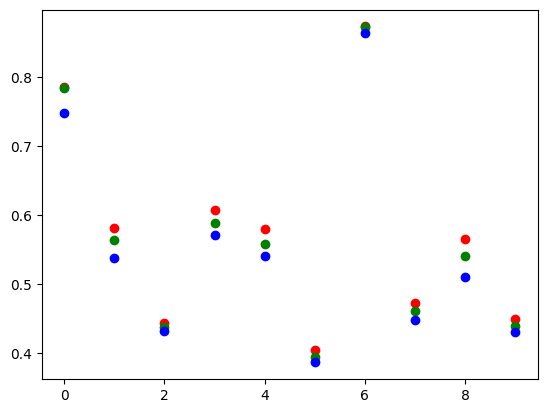

In [45]:
mesure = [i for i in range(10)]

plt.plot(mesure,accuracy['dorm']['0.1'],'ro',
         mesure,accuracy['dorm']['0.2'],'go',
         mesure,accuracy['dorm']['0.3'],'bo',)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

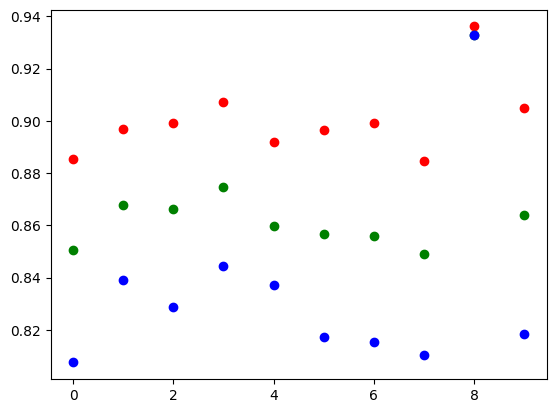

In [46]:
mesure = [i for i in range(10)]

plt.plot(mesure,accuracy['gender']['0.1'],'ro',
         mesure,accuracy['gender']['0.2'],'go',
         mesure,accuracy['gender']['0.3'],'bo',)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

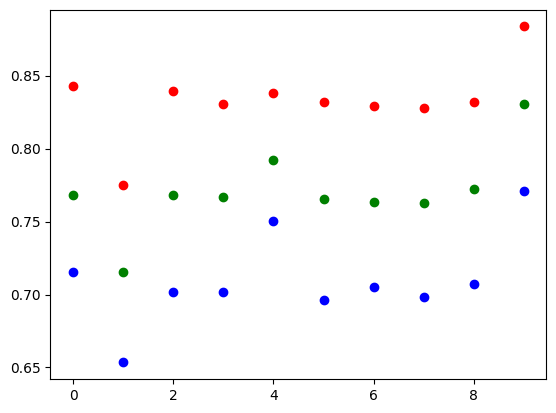

In [47]:
mesure = [i for i in range(10)]

plt.plot(mesure,accuracy['major_index']['0.1'],'ro',
         mesure,accuracy['major_index']['0.2'],'go',
         mesure,accuracy['major_index']['0.3'],'bo',)
plt.show

# Retour sur la question 4 #

In [18]:
Caltech_metrics = {
    "0.05": {
        "50": {
            "CommonNeighbors": {
                "nb_inter": 1,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.001201923076923077
            },
            "Jaccard": {
                "nb_inter": 3,
                "top_k": 0.06,
                "precision_k": 0.06,
                "recall_k": 0.003605769230769231
            },
            "Adamic_Adar": {
                "nb_inter": 1,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.001201923076923077
            }
        },
        "100": {
            "CommonNeighbors": {
                "nb_inter": 5,
                "top_k": 0.05,
                "precision_k": 0.05,
                "recall_k": 0.006009615384615385
            },
            "Jaccard": {
                "nb_inter": 1,
                "top_k": 0.01,
                "precision_k": 0.01,
                "recall_k": 0.001201923076923077
            },
            "Adamic_Adar": {
                "nb_inter": 6,
                "top_k": 0.06,
                "precision_k": 0.06,
                "recall_k": 0.007211538461538462
            }
        },
        "150": {
            "CommonNeighbors": {
                "nb_inter": 6,
                "top_k": 0.04,
                "precision_k": 0.04,
                "recall_k": 0.007211538461538462
            },
            "Jaccard": {
                "nb_inter": 7,
                "top_k": 0.04666666666666667,
                "precision_k": 0.04666666666666667,
                "recall_k": 0.008413461538461538
            },
            "Adamic_Adar": {
                "nb_inter": 5,
                "top_k": 0.03333333333333333,
                "precision_k": 0.03333333333333333,
                "recall_k": 0.006009615384615385
            }
        },
        "200": {
            "CommonNeighbors": {
                "nb_inter": 3,
                "top_k": 0.015,
                "precision_k": 0.015,
                "recall_k": 0.003605769230769231
            },
            "Jaccard": {
                "nb_inter": 2,
                "top_k": 0.01,
                "precision_k": 0.01,
                "recall_k": 0.002403846153846154
            },
            "Adamic_Adar": {
                "nb_inter": 4,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.004807692307692308
            }
        },
        "250": {
            "CommonNeighbors": {
                "nb_inter": 9,
                "top_k": 0.036,
                "precision_k": 0.036,
                "recall_k": 0.010817307692307692
            },
            "Jaccard": {
                "nb_inter": 3,
                "top_k": 0.012,
                "precision_k": 0.012,
                "recall_k": 0.003605769230769231
            },
            "Adamic_Adar": {
                "nb_inter": 9,
                "top_k": 0.036,
                "precision_k": 0.036,
                "recall_k": 0.010817307692307692
            }
        },
        "300": {
            "CommonNeighbors": {
                "nb_inter": 9,
                "top_k": 0.03,
                "precision_k": 0.03,
                "recall_k": 0.010817307692307692
            },
            "Jaccard": {
                "nb_inter": 5,
                "top_k": 0.016666666666666666,
                "precision_k": 0.016666666666666666,
                "recall_k": 0.006009615384615385
            },
            "Adamic_Adar": {
                "nb_inter": 9,
                "top_k": 0.03,
                "precision_k": 0.03,
                "recall_k": 0.010817307692307692
            }
        },
        "350": {
            "CommonNeighbors": {
                "nb_inter": 7,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.008413461538461538
            },
            "Jaccard": {
                "nb_inter": 10,
                "top_k": 0.02857142857142857,
                "precision_k": 0.02857142857142857,
                "recall_k": 0.01201923076923077
            },
            "Adamic_Adar": {
                "nb_inter": 7,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.008413461538461538
            }
        },
        "400": {
            "CommonNeighbors": {
                "nb_inter": 7,
                "top_k": 0.0175,
                "precision_k": 0.0175,
                "recall_k": 0.008413461538461538
            },
            "Jaccard": {
                "nb_inter": 5,
                "top_k": 0.0125,
                "precision_k": 0.0125,
                "recall_k": 0.006009615384615385
            },
            "Adamic_Adar": {
                "nb_inter": 7,
                "top_k": 0.0175,
                "precision_k": 0.0175,
                "recall_k": 0.008413461538461538
            }
        }
    },
    "0.1": {
        "50": {
            "CommonNeighbors": {
                "nb_inter": 3,
                "top_k": 0.06,
                "precision_k": 0.06,
                "recall_k": 0.0018018018018018018
            },
            "Jaccard": {
                "nb_inter": 2,
                "top_k": 0.04,
                "precision_k": 0.04,
                "recall_k": 0.0012012012012012011
            },
            "Adamic_Adar": {
                "nb_inter": 2,
                "top_k": 0.04,
                "precision_k": 0.04,
                "recall_k": 0.0012012012012012011
            }
        },
        "100": {
            "CommonNeighbors": {
                "nb_inter": 4,
                "top_k": 0.04,
                "precision_k": 0.04,
                "recall_k": 0.0024024024024024023
            },
            "Jaccard": {
                "nb_inter": 6,
                "top_k": 0.06,
                "precision_k": 0.06,
                "recall_k": 0.0036036036036036037
            },
            "Adamic_Adar": {
                "nb_inter": 4,
                "top_k": 0.04,
                "precision_k": 0.04,
                "recall_k": 0.0024024024024024023
            }
        },
        "150": {
            "CommonNeighbors": {
                "nb_inter": 14,
                "top_k": 0.09333333333333334,
                "precision_k": 0.09333333333333334,
                "recall_k": 0.008408408408408409
            },
            "Jaccard": {
                "nb_inter": 6,
                "top_k": 0.04,
                "precision_k": 0.04,
                "recall_k": 0.0036036036036036037
            },
            "Adamic_Adar": {
                "nb_inter": 12,
                "top_k": 0.08,
                "precision_k": 0.08,
                "recall_k": 0.007207207207207207
            }
        },
        "200": {
            "CommonNeighbors": {
                "nb_inter": 6,
                "top_k": 0.03,
                "precision_k": 0.03,
                "recall_k": 0.0036036036036036037
            },
            "Jaccard": {
                "nb_inter": 6,
                "top_k": 0.03,
                "precision_k": 0.03,
                "recall_k": 0.0036036036036036037
            },
            "Adamic_Adar": {
                "nb_inter": 8,
                "top_k": 0.04,
                "precision_k": 0.04,
                "recall_k": 0.004804804804804805
            }
        },
        "250": {
            "CommonNeighbors": {
                "nb_inter": 11,
                "top_k": 0.044,
                "precision_k": 0.044,
                "recall_k": 0.006606606606606606
            },
            "Jaccard": {
                "nb_inter": 19,
                "top_k": 0.076,
                "precision_k": 0.076,
                "recall_k": 0.011411411411411412
            },
            "Adamic_Adar": {
                "nb_inter": 11,
                "top_k": 0.044,
                "precision_k": 0.044,
                "recall_k": 0.006606606606606606
            }
        },
        "300": {
            "CommonNeighbors": {
                "nb_inter": 16,
                "top_k": 0.05333333333333334,
                "precision_k": 0.05333333333333334,
                "recall_k": 0.00960960960960961
            },
            "Jaccard": {
                "nb_inter": 8,
                "top_k": 0.02666666666666667,
                "precision_k": 0.02666666666666667,
                "recall_k": 0.004804804804804805
            },
            "Adamic_Adar": {
                "nb_inter": 16,
                "top_k": 0.05333333333333334,
                "precision_k": 0.05333333333333334,
                "recall_k": 0.00960960960960961
            }
        },
        "350": {
            "CommonNeighbors": {
                "nb_inter": 10,
                "top_k": 0.02857142857142857,
                "precision_k": 0.02857142857142857,
                "recall_k": 0.006006006006006006
            },
            "Jaccard": {
                "nb_inter": 15,
                "top_k": 0.04285714285714286,
                "precision_k": 0.04285714285714286,
                "recall_k": 0.009009009009009009
            },
            "Adamic_Adar": {
                "nb_inter": 11,
                "top_k": 0.03142857142857143,
                "precision_k": 0.03142857142857143,
                "recall_k": 0.006606606606606606
            }
        },
        "400": {
            "CommonNeighbors": {
                "nb_inter": 17,
                "top_k": 0.0425,
                "precision_k": 0.0425,
                "recall_k": 0.01021021021021021
            },
            "Jaccard": {
                "nb_inter": 16,
                "top_k": 0.04,
                "precision_k": 0.04,
                "recall_k": 0.00960960960960961
            },
            "Adamic_Adar": {
                "nb_inter": 17,
                "top_k": 0.0425,
                "precision_k": 0.0425,
                "recall_k": 0.01021021021021021
            }
        }
    },
    "0.15": {
        "50": {
            "CommonNeighbors": {
                "nb_inter": 5,
                "top_k": 0.1,
                "precision_k": 0.1,
                "recall_k": 0.0020016012810248197
            },
            "Jaccard": {
                "nb_inter": 3,
                "top_k": 0.06,
                "precision_k": 0.06,
                "recall_k": 0.0012009607686148918
            },
            "Adamic_Adar": {
                "nb_inter": 4,
                "top_k": 0.08,
                "precision_k": 0.08,
                "recall_k": 0.0016012810248198558
            }
        },
        "100": {
            "CommonNeighbors": {
                "nb_inter": 6,
                "top_k": 0.06,
                "precision_k": 0.06,
                "recall_k": 0.0024019215372297837
            },
            "Jaccard": {
                "nb_inter": 3,
                "top_k": 0.03,
                "precision_k": 0.03,
                "recall_k": 0.0012009607686148918
            },
            "Adamic_Adar": {
                "nb_inter": 6,
                "top_k": 0.06,
                "precision_k": 0.06,
                "recall_k": 0.0024019215372297837
            }
        },
        "150": {
            "CommonNeighbors": {
                "nb_inter": 7,
                "top_k": 0.04666666666666667,
                "precision_k": 0.04666666666666667,
                "recall_k": 0.0028022417934347476
            },
            "Jaccard": {
                "nb_inter": 4,
                "top_k": 0.02666666666666667,
                "precision_k": 0.02666666666666667,
                "recall_k": 0.0016012810248198558
            },
            "Adamic_Adar": {
                "nb_inter": 7,
                "top_k": 0.04666666666666667,
                "precision_k": 0.04666666666666667,
                "recall_k": 0.0028022417934347476
            }
        },
        "200": {
            "CommonNeighbors": {
                "nb_inter": 12,
                "top_k": 0.06,
                "precision_k": 0.06,
                "recall_k": 0.004803843074459567
            },
            "Jaccard": {
                "nb_inter": 10,
                "top_k": 0.05,
                "precision_k": 0.05,
                "recall_k": 0.0040032025620496394
            },
            "Adamic_Adar": {
                "nb_inter": 13,
                "top_k": 0.065,
                "precision_k": 0.065,
                "recall_k": 0.005204163330664532
            }
        },
        "250": {
            "CommonNeighbors": {
                "nb_inter": 15,
                "top_k": 0.06,
                "precision_k": 0.06,
                "recall_k": 0.00600480384307446
            },
            "Jaccard": {
                "nb_inter": 15,
                "top_k": 0.06,
                "precision_k": 0.06,
                "recall_k": 0.00600480384307446
            },
            "Adamic_Adar": {
                "nb_inter": 17,
                "top_k": 0.068,
                "precision_k": 0.068,
                "recall_k": 0.0068054443554843875
            }
        },
        "300": {
            "CommonNeighbors": {
                "nb_inter": 19,
                "top_k": 0.06333333333333334,
                "precision_k": 0.06333333333333334,
                "recall_k": 0.007606084867894315
            },
            "Jaccard": {
                "nb_inter": 20,
                "top_k": 0.06666666666666667,
                "precision_k": 0.06666666666666667,
                "recall_k": 0.008006405124099279
            },
            "Adamic_Adar": {
                "nb_inter": 19,
                "top_k": 0.06333333333333334,
                "precision_k": 0.06333333333333334,
                "recall_k": 0.007606084867894315
            }
        },
        "350": {
            "CommonNeighbors": {
                "nb_inter": 24,
                "top_k": 0.06857142857142857,
                "precision_k": 0.06857142857142857,
                "recall_k": 0.009607686148919135
            },
            "Jaccard": {
                "nb_inter": 15,
                "top_k": 0.04285714285714286,
                "precision_k": 0.04285714285714286,
                "recall_k": 0.00600480384307446
            },
            "Adamic_Adar": {
                "nb_inter": 26,
                "top_k": 0.07428571428571429,
                "precision_k": 0.07428571428571429,
                "recall_k": 0.010408326661329063
            }
        },
        "400": {
            "CommonNeighbors": {
                "nb_inter": 32,
                "top_k": 0.08,
                "precision_k": 0.08,
                "recall_k": 0.012810248198558846
            },
            "Jaccard": {
                "nb_inter": 26,
                "top_k": 0.065,
                "precision_k": 0.065,
                "recall_k": 0.010408326661329063
            },
            "Adamic_Adar": {
                "nb_inter": 34,
                "top_k": 0.085,
                "precision_k": 0.085,
                "recall_k": 0.013610888710968775
            }
        }
    },
    "0.2": {
        "50": {
            "CommonNeighbors": {
                "nb_inter": 4,
                "top_k": 0.08,
                "precision_k": 0.08,
                "recall_k": 0.0012008405884118883
            },
            "Jaccard": {
                "nb_inter": 8,
                "top_k": 0.16,
                "precision_k": 0.16,
                "recall_k": 0.0024016811768237767
            },
            "Adamic_Adar": {
                "nb_inter": 4,
                "top_k": 0.08,
                "precision_k": 0.08,
                "recall_k": 0.0012008405884118883
            }
        },
        "100": {
            "CommonNeighbors": {
                "nb_inter": 13,
                "top_k": 0.13,
                "precision_k": 0.13,
                "recall_k": 0.003902731912338637
            },
            "Jaccard": {
                "nb_inter": 10,
                "top_k": 0.1,
                "precision_k": 0.1,
                "recall_k": 0.003002101471029721
            },
            "Adamic_Adar": {
                "nb_inter": 13,
                "top_k": 0.13,
                "precision_k": 0.13,
                "recall_k": 0.003902731912338637
            }
        },
        "150": {
            "CommonNeighbors": {
                "nb_inter": 14,
                "top_k": 0.09333333333333334,
                "precision_k": 0.09333333333333334,
                "recall_k": 0.004202942059441609
            },
            "Jaccard": {
                "nb_inter": 11,
                "top_k": 0.07333333333333333,
                "precision_k": 0.07333333333333333,
                "recall_k": 0.003302311618132693
            },
            "Adamic_Adar": {
                "nb_inter": 16,
                "top_k": 0.10666666666666667,
                "precision_k": 0.10666666666666667,
                "recall_k": 0.004803362353647553
            }
        },
        "200": {
            "CommonNeighbors": {
                "nb_inter": 21,
                "top_k": 0.105,
                "precision_k": 0.105,
                "recall_k": 0.006304413089162414
            },
            "Jaccard": {
                "nb_inter": 18,
                "top_k": 0.09,
                "precision_k": 0.09,
                "recall_k": 0.005403782647853498
            },
            "Adamic_Adar": {
                "nb_inter": 24,
                "top_k": 0.12,
                "precision_k": 0.12,
                "recall_k": 0.00720504353047133
            }
        },
        "250": {
            "CommonNeighbors": {
                "nb_inter": 32,
                "top_k": 0.128,
                "precision_k": 0.128,
                "recall_k": 0.009606724707295107
            },
            "Jaccard": {
                "nb_inter": 16,
                "top_k": 0.064,
                "precision_k": 0.064,
                "recall_k": 0.004803362353647553
            },
            "Adamic_Adar": {
                "nb_inter": 34,
                "top_k": 0.136,
                "precision_k": 0.136,
                "recall_k": 0.01020714500150105
            }
        },
        "300": {
            "CommonNeighbors": {
                "nb_inter": 36,
                "top_k": 0.12,
                "precision_k": 0.12,
                "recall_k": 0.010807565295706995
            },
            "Jaccard": {
                "nb_inter": 18,
                "top_k": 0.06,
                "precision_k": 0.06,
                "recall_k": 0.005403782647853498
            },
            "Adamic_Adar": {
                "nb_inter": 37,
                "top_k": 0.12333333333333334,
                "precision_k": 0.12333333333333334,
                "recall_k": 0.011107775442809968
            }
        },
        "350": {
            "CommonNeighbors": {
                "nb_inter": 31,
                "top_k": 0.08857142857142856,
                "precision_k": 0.08857142857142856,
                "recall_k": 0.009306514560192134
            },
            "Jaccard": {
                "nb_inter": 32,
                "top_k": 0.09142857142857143,
                "precision_k": 0.09142857142857143,
                "recall_k": 0.009606724707295107
            },
            "Adamic_Adar": {
                "nb_inter": 31,
                "top_k": 0.08857142857142856,
                "precision_k": 0.08857142857142856,
                "recall_k": 0.009306514560192134
            }
        },
        "400": {
            "CommonNeighbors": {
                "nb_inter": 35,
                "top_k": 0.0875,
                "precision_k": 0.0875,
                "recall_k": 0.010507355148604023
            },
            "Jaccard": {
                "nb_inter": 38,
                "top_k": 0.095,
                "precision_k": 0.095,
                "recall_k": 0.011407985589912939
            },
            "Adamic_Adar": {
                "nb_inter": 35,
                "top_k": 0.0875,
                "precision_k": 0.0875,
                "recall_k": 0.010507355148604023
            }
        }
    }
}

In [27]:
Pred_dict = {}
k_list = [str(k*50) for k in range(1,9)]
for pred in ["CommonNeighbors","Jaccard","Adamic_Adar"]:
    Pred_dict[pred]={}
    for met in ["top_k","recall_k"]:
        Pred_dict[pred][met]={}
        for fraction in ["0.05","0.1","0.15","0.2"]:
            Pred_dict[pred][met][fraction]=[]
            for k in k_list:
                Pred_dict[pred][met][fraction].append(Caltech_metrics[fraction][k][pred][met])

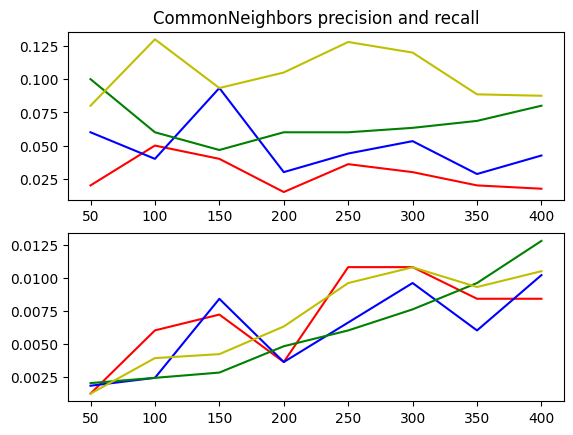

In [72]:
plt.subplot(211)
plt.title("CommonNeighbors precision and recall")
plt.plot(k_list,Pred_dict["CommonNeighbors"]["top_k"]["0.05"],'r',
         k_list,Pred_dict["CommonNeighbors"]["top_k"]["0.1"],'b',
         k_list,Pred_dict["CommonNeighbors"]["top_k"]["0.15"],'g',
         k_list,Pred_dict["CommonNeighbors"]["top_k"]["0.2"],'y',)
plt.subplot(212)
plt.plot(k_list,Pred_dict["CommonNeighbors"]["recall_k"]["0.05"],'r',
         k_list,Pred_dict["CommonNeighbors"]["recall_k"]["0.1"],'b',
         k_list,Pred_dict["CommonNeighbors"]["recall_k"]["0.15"],'g',
         k_list,Pred_dict["CommonNeighbors"]["recall_k"]["0.2"],'y',)
plt.show()

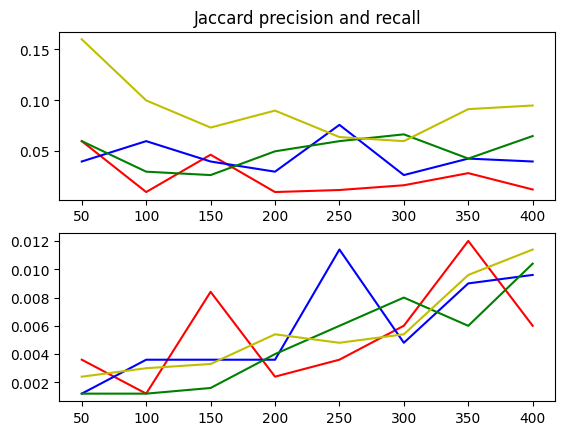

In [73]:
plt.subplot(211)
plt.title("Jaccard precision and recall")
plt.plot(k_list,Pred_dict["Jaccard"]["top_k"]["0.05"],'r',
         k_list,Pred_dict["Jaccard"]["top_k"]["0.1"],'b',
         k_list,Pred_dict["Jaccard"]["top_k"]["0.15"],'g',
         k_list,Pred_dict["Jaccard"]["top_k"]["0.2"],'y',)
plt.subplot(212)
plt.plot(k_list,Pred_dict["Jaccard"]["recall_k"]["0.05"],'r',
         k_list,Pred_dict["Jaccard"]["recall_k"]["0.1"],'b',
         k_list,Pred_dict["Jaccard"]["recall_k"]["0.15"],'g',
         k_list,Pred_dict["Jaccard"]["recall_k"]["0.2"],'y',)
plt.show()

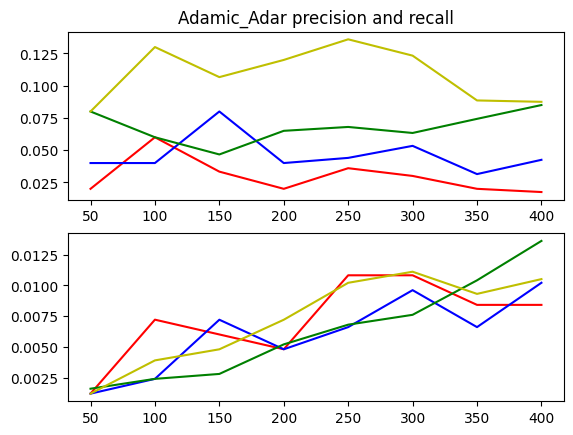

In [74]:
plt.subplot(211)
plt.title("Adamic_Adar precision and recall")
plt.plot(k_list,Pred_dict["Adamic_Adar"]["top_k"]["0.05"],'r',
         k_list,Pred_dict["Adamic_Adar"]["top_k"]["0.1"],'b',
         k_list,Pred_dict["Adamic_Adar"]["top_k"]["0.15"],'g',
         k_list,Pred_dict["Adamic_Adar"]["top_k"]["0.2"],'y',)
plt.subplot(212)
plt.plot(k_list,Pred_dict["Adamic_Adar"]["recall_k"]["0.05"],'r',
         k_list,Pred_dict["Adamic_Adar"]["recall_k"]["0.1"],'b',
         k_list,Pred_dict["Adamic_Adar"]["recall_k"]["0.15"],'g',
         k_list,Pred_dict["Adamic_Adar"]["recall_k"]["0.2"],'y',)
plt.show()

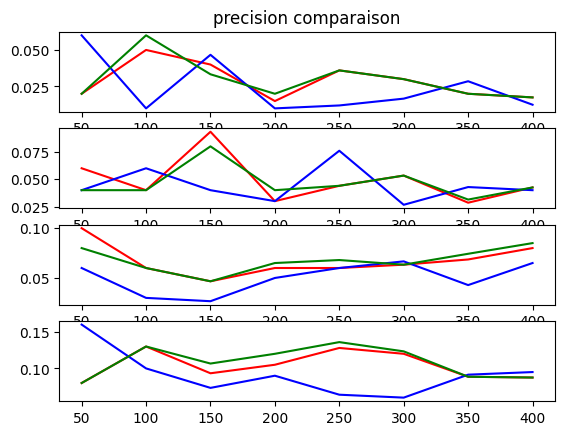

In [79]:
plt.subplot(411)
plt.title("precision comparaison")
plt.plot(k_list,Pred_dict["CommonNeighbors"]["top_k"]["0.05"],'r',
         k_list,Pred_dict["Jaccard"]["top_k"]["0.05"],'b',
         k_list,Pred_dict["Adamic_Adar"]["top_k"]["0.05"],'g')
plt.subplot(412)
plt.plot(k_list,Pred_dict["CommonNeighbors"]["top_k"]["0.1"],'r',
         k_list,Pred_dict["Jaccard"]["top_k"]["0.1"],'b',
         k_list,Pred_dict["Adamic_Adar"]["top_k"]["0.1"],'g')
plt.subplot(413)
plt.plot(k_list,Pred_dict["CommonNeighbors"]["top_k"]["0.15"],'r',
         k_list,Pred_dict["Jaccard"]["top_k"]["0.15"],'b',
         k_list,Pred_dict["Adamic_Adar"]["top_k"]["0.15"],'g')
plt.subplot(414)
plt.plot(k_list,Pred_dict["CommonNeighbors"]["top_k"]["0.2"],'r',
         k_list,Pred_dict["Jaccard"]["top_k"]["0.2"],'b',
         k_list,Pred_dict["Adamic_Adar"]["top_k"]["0.2"],'g')
plt.show()

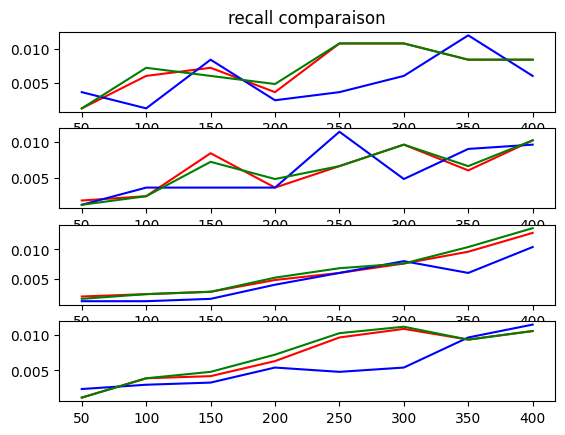

In [80]:
plt.subplot(411)
plt.title("recall comparaison")
plt.plot(k_list,Pred_dict["CommonNeighbors"]["recall_k"]["0.05"],'r',
         k_list,Pred_dict["Jaccard"]["recall_k"]["0.05"],'b',
         k_list,Pred_dict["Adamic_Adar"]["recall_k"]["0.05"],'g')
plt.subplot(412)
plt.plot(k_list,Pred_dict["CommonNeighbors"]["recall_k"]["0.1"],'r',
         k_list,Pred_dict["Jaccard"]["recall_k"]["0.1"],'b',
         k_list,Pred_dict["Adamic_Adar"]["recall_k"]["0.1"],'g')
plt.subplot(413)
plt.plot(k_list,Pred_dict["CommonNeighbors"]["recall_k"]["0.15"],'r',
         k_list,Pred_dict["Jaccard"]["recall_k"]["0.15"],'b',
         k_list,Pred_dict["Adamic_Adar"]["recall_k"]["0.15"],'g')
plt.subplot(414)
plt.plot(k_list,Pred_dict["CommonNeighbors"]["recall_k"]["0.2"],'r',
         k_list,Pred_dict["Jaccard"]["recall_k"]["0.2"],'b',
         k_list,Pred_dict["Adamic_Adar"]["recall_k"]["0.2"],'g')
plt.show()

In [81]:
Hamilton_met = {
    "0.05": {
        "50": {
            "CommonNeighbors": {
                "nb_inter": 1,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.00020751193193608634
            },
            "Jaccard": {
                "nb_inter": 3,
                "top_k": 0.06,
                "precision_k": 0.06,
                "recall_k": 0.0006225357958082589
            },
            "Adamic_Adar": {
                "nb_inter": 1,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.00020751193193608634
            }
        },
        "100": {
            "CommonNeighbors": {
                "nb_inter": 1,
                "top_k": 0.01,
                "precision_k": 0.01,
                "recall_k": 0.00020751193193608634
            },
            "Jaccard": {
                "nb_inter": 1,
                "top_k": 0.01,
                "precision_k": 0.01,
                "recall_k": 0.00020751193193608634
            },
            "Adamic_Adar": {
                "nb_inter": 1,
                "top_k": 0.01,
                "precision_k": 0.01,
                "recall_k": 0.00020751193193608634
            }
        },
        "150": {
            "CommonNeighbors": {
                "nb_inter": 2,
                "top_k": 0.013333333333333334,
                "precision_k": 0.013333333333333334,
                "recall_k": 0.0004150238638721727
            },
            "Jaccard": {
                "nb_inter": 2,
                "top_k": 0.013333333333333334,
                "precision_k": 0.013333333333333334,
                "recall_k": 0.0004150238638721727
            },
            "Adamic_Adar": {
                "nb_inter": 2,
                "top_k": 0.013333333333333334,
                "precision_k": 0.013333333333333334,
                "recall_k": 0.0004150238638721727
            }
        },
        "200": {
            "CommonNeighbors": {
                "nb_inter": 4,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.0008300477277443454
            },
            "Jaccard": {
                "nb_inter": 6,
                "top_k": 0.03,
                "precision_k": 0.03,
                "recall_k": 0.0012450715916165179
            },
            "Adamic_Adar": {
                "nb_inter": 4,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.0008300477277443454
            }
        },
        "250": {
            "CommonNeighbors": {
                "nb_inter": 5,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.0010375596596804316
            },
            "Jaccard": {
                "nb_inter": 6,
                "top_k": 0.024,
                "precision_k": 0.024,
                "recall_k": 0.0012450715916165179
            },
            "Adamic_Adar": {
                "nb_inter": 5,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.0010375596596804316
            }
        },
        "300": {
            "CommonNeighbors": {
                "nb_inter": 6,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.0012450715916165179
            },
            "Jaccard": {
                "nb_inter": 9,
                "top_k": 0.03,
                "precision_k": 0.03,
                "recall_k": 0.001867607387424777
            },
            "Adamic_Adar": {
                "nb_inter": 5,
                "top_k": 0.016666666666666666,
                "precision_k": 0.016666666666666666,
                "recall_k": 0.0010375596596804316
            }
        },
        "350": {
            "CommonNeighbors": {
                "nb_inter": 7,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.0014525835235526042
            },
            "Jaccard": {
                "nb_inter": 6,
                "top_k": 0.017142857142857144,
                "precision_k": 0.017142857142857144,
                "recall_k": 0.0012450715916165179
            },
            "Adamic_Adar": {
                "nb_inter": 6,
                "top_k": 0.017142857142857144,
                "precision_k": 0.017142857142857144,
                "recall_k": 0.0012450715916165179
            }
        },
        "400": {
            "CommonNeighbors": {
                "nb_inter": 10,
                "top_k": 0.025,
                "precision_k": 0.025,
                "recall_k": 0.002075119319360863
            },
            "Jaccard": {
                "nb_inter": 7,
                "top_k": 0.0175,
                "precision_k": 0.0175,
                "recall_k": 0.0014525835235526042
            },
            "Adamic_Adar": {
                "nb_inter": 9,
                "top_k": 0.0225,
                "precision_k": 0.0225,
                "recall_k": 0.001867607387424777
            }
        }
    },
    "0.1": {
        "50": {
            "CommonNeighbors": {
                "nb_inter": 1,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.00010374520178441747
            },
            "Jaccard": {
                "nb_inter": 0,
                "top_k": 0.0,
                "precision_k": 0.0,
                "recall_k": 0.0
            },
            "Adamic_Adar": {
                "nb_inter": 1,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 0.00010374520178441747
            }
        },
        "100": {
            "CommonNeighbors": {
                "nb_inter": 7,
                "top_k": 0.07,
                "precision_k": 0.07,
                "recall_k": 0.0007262164124909223
            },
            "Jaccard": {
                "nb_inter": 5,
                "top_k": 0.05,
                "precision_k": 0.05,
                "recall_k": 0.0005187260089220873
            },
            "Adamic_Adar": {
                "nb_inter": 6,
                "top_k": 0.06,
                "precision_k": 0.06,
                "recall_k": 0.0006224712107065049
            }
        },
        "150": {
            "CommonNeighbors": {
                "nb_inter": 7,
                "top_k": 0.04666666666666667,
                "precision_k": 0.04666666666666667,
                "recall_k": 0.0007262164124909223
            },
            "Jaccard": {
                "nb_inter": 6,
                "top_k": 0.04,
                "precision_k": 0.04,
                "recall_k": 0.0006224712107065049
            },
            "Adamic_Adar": {
                "nb_inter": 7,
                "top_k": 0.04666666666666667,
                "precision_k": 0.04666666666666667,
                "recall_k": 0.0007262164124909223
            }
        },
        "200": {
            "CommonNeighbors": {
                "nb_inter": 5,
                "top_k": 0.025,
                "precision_k": 0.025,
                "recall_k": 0.0005187260089220873
            },
            "Jaccard": {
                "nb_inter": 16,
                "top_k": 0.08,
                "precision_k": 0.08,
                "recall_k": 0.0016599232285506795
            },
            "Adamic_Adar": {
                "nb_inter": 5,
                "top_k": 0.025,
                "precision_k": 0.025,
                "recall_k": 0.0005187260089220873
            }
        },
        "250": {
            "CommonNeighbors": {
                "nb_inter": 13,
                "top_k": 0.052,
                "precision_k": 0.052,
                "recall_k": 0.0013486876231974271
            },
            "Jaccard": {
                "nb_inter": 13,
                "top_k": 0.052,
                "precision_k": 0.052,
                "recall_k": 0.0013486876231974271
            },
            "Adamic_Adar": {
                "nb_inter": 14,
                "top_k": 0.056,
                "precision_k": 0.056,
                "recall_k": 0.0014524328249818446
            }
        },
        "300": {
            "CommonNeighbors": {
                "nb_inter": 17,
                "top_k": 0.056666666666666664,
                "precision_k": 0.056666666666666664,
                "recall_k": 0.001763668430335097
            },
            "Jaccard": {
                "nb_inter": 12,
                "top_k": 0.04,
                "precision_k": 0.04,
                "recall_k": 0.0012449424214130097
            },
            "Adamic_Adar": {
                "nb_inter": 17,
                "top_k": 0.056666666666666664,
                "precision_k": 0.056666666666666664,
                "recall_k": 0.001763668430335097
            }
        },
        "350": {
            "CommonNeighbors": {
                "nb_inter": 20,
                "top_k": 0.05714285714285714,
                "precision_k": 0.05714285714285714,
                "recall_k": 0.0020749040356883492
            },
            "Jaccard": {
                "nb_inter": 16,
                "top_k": 0.045714285714285714,
                "precision_k": 0.045714285714285714,
                "recall_k": 0.0016599232285506795
            },
            "Adamic_Adar": {
                "nb_inter": 20,
                "top_k": 0.05714285714285714,
                "precision_k": 0.05714285714285714,
                "recall_k": 0.0020749040356883492
            }
        },
        "400": {
            "CommonNeighbors": {
                "nb_inter": 14,
                "top_k": 0.035,
                "precision_k": 0.035,
                "recall_k": 0.0014524328249818446
            },
            "Jaccard": {
                "nb_inter": 17,
                "top_k": 0.0425,
                "precision_k": 0.0425,
                "recall_k": 0.001763668430335097
            },
            "Adamic_Adar": {
                "nb_inter": 16,
                "top_k": 0.04,
                "precision_k": 0.04,
                "recall_k": 0.0016599232285506795
            }
        }
    },
    "0.15": {
        "50": {
            "CommonNeighbors": {
                "nb_inter": 3,
                "top_k": 0.06,
                "precision_k": 0.06,
                "recall_k": 0.0002074832284390345
            },
            "Jaccard": {
                "nb_inter": 1,
                "top_k": 0.02,
                "precision_k": 0.02,
                "recall_k": 6.916107614634484e-05
            },
            "Adamic_Adar": {
                "nb_inter": 2,
                "top_k": 0.04,
                "precision_k": 0.04,
                "recall_k": 0.00013832215229268968
            }
        },
        "100": {
            "CommonNeighbors": {
                "nb_inter": 7,
                "top_k": 0.07,
                "precision_k": 0.07,
                "recall_k": 0.0004841275330244139
            },
            "Jaccard": {
                "nb_inter": 8,
                "top_k": 0.08,
                "precision_k": 0.08,
                "recall_k": 0.0005532886091707587
            },
            "Adamic_Adar": {
                "nb_inter": 7,
                "top_k": 0.07,
                "precision_k": 0.07,
                "recall_k": 0.0004841275330244139
            }
        },
        "150": {
            "CommonNeighbors": {
                "nb_inter": 11,
                "top_k": 0.07333333333333333,
                "precision_k": 0.07333333333333333,
                "recall_k": 0.0007607718376097932
            },
            "Jaccard": {
                "nb_inter": 14,
                "top_k": 0.09333333333333334,
                "precision_k": 0.09333333333333334,
                "recall_k": 0.0009682550660488278
            },
            "Adamic_Adar": {
                "nb_inter": 11,
                "top_k": 0.07333333333333333,
                "precision_k": 0.07333333333333333,
                "recall_k": 0.0007607718376097932
            }
        },
        "200": {
            "CommonNeighbors": {
                "nb_inter": 15,
                "top_k": 0.075,
                "precision_k": 0.075,
                "recall_k": 0.0010374161421951725
            },
            "Jaccard": {
                "nb_inter": 18,
                "top_k": 0.09,
                "precision_k": 0.09,
                "recall_k": 0.001244899370634207
            },
            "Adamic_Adar": {
                "nb_inter": 14,
                "top_k": 0.07,
                "precision_k": 0.07,
                "recall_k": 0.0009682550660488278
            }
        },
        "250": {
            "CommonNeighbors": {
                "nb_inter": 23,
                "top_k": 0.092,
                "precision_k": 0.092,
                "recall_k": 0.0015907047513659314
            },
            "Jaccard": {
                "nb_inter": 22,
                "top_k": 0.088,
                "precision_k": 0.088,
                "recall_k": 0.0015215436752195864
            },
            "Adamic_Adar": {
                "nb_inter": 22,
                "top_k": 0.088,
                "precision_k": 0.088,
                "recall_k": 0.0015215436752195864
            }
        },
        "300": {
            "CommonNeighbors": {
                "nb_inter": 18,
                "top_k": 0.06,
                "precision_k": 0.06,
                "recall_k": 0.001244899370634207
            },
            "Jaccard": {
                "nb_inter": 15,
                "top_k": 0.05,
                "precision_k": 0.05,
                "recall_k": 0.0010374161421951725
            },
            "Adamic_Adar": {
                "nb_inter": 16,
                "top_k": 0.05333333333333334,
                "precision_k": 0.05333333333333334,
                "recall_k": 0.0011065772183415175
            }
        },
        "350": {
            "CommonNeighbors": {
                "nb_inter": 32,
                "top_k": 0.09142857142857143,
                "precision_k": 0.09142857142857143,
                "recall_k": 0.002213154436683035
            },
            "Jaccard": {
                "nb_inter": 24,
                "top_k": 0.06857142857142857,
                "precision_k": 0.06857142857142857,
                "recall_k": 0.001659865827512276
            },
            "Adamic_Adar": {
                "nb_inter": 29,
                "top_k": 0.08285714285714285,
                "precision_k": 0.08285714285714285,
                "recall_k": 0.0020056712082440003
            }
        },
        "400": {
            "CommonNeighbors": {
                "nb_inter": 30,
                "top_k": 0.075,
                "precision_k": 0.075,
                "recall_k": 0.002074832284390345
            },
            "Jaccard": {
                "nb_inter": 26,
                "top_k": 0.065,
                "precision_k": 0.065,
                "recall_k": 0.0017981879798049658
            },
            "Adamic_Adar": {
                "nb_inter": 33,
                "top_k": 0.0825,
                "precision_k": 0.0825,
                "recall_k": 0.0022823155128293797
            }
        }
    },
    "0.2": {
        "50": {
            "CommonNeighbors": {
                "nb_inter": 6,
                "top_k": 0.12,
                "precision_k": 0.12,
                "recall_k": 0.0003112356053532524
            },
            "Jaccard": {
                "nb_inter": 4,
                "top_k": 0.08,
                "precision_k": 0.08,
                "recall_k": 0.00020749040356883493
            },
            "Adamic_Adar": {
                "nb_inter": 6,
                "top_k": 0.12,
                "precision_k": 0.12,
                "recall_k": 0.0003112356053532524
            }
        },
        "100": {
            "CommonNeighbors": {
                "nb_inter": 7,
                "top_k": 0.07,
                "precision_k": 0.07,
                "recall_k": 0.00036310820624546115
            },
            "Jaccard": {
                "nb_inter": 10,
                "top_k": 0.1,
                "precision_k": 0.1,
                "recall_k": 0.0005187260089220873
            },
            "Adamic_Adar": {
                "nb_inter": 7,
                "top_k": 0.07,
                "precision_k": 0.07,
                "recall_k": 0.00036310820624546115
            }
        },
        "150": {
            "CommonNeighbors": {
                "nb_inter": 18,
                "top_k": 0.12,
                "precision_k": 0.12,
                "recall_k": 0.0009337068160597573
            },
            "Jaccard": {
                "nb_inter": 13,
                "top_k": 0.08666666666666667,
                "precision_k": 0.08666666666666667,
                "recall_k": 0.0006743438115987136
            },
            "Adamic_Adar": {
                "nb_inter": 19,
                "top_k": 0.12666666666666668,
                "precision_k": 0.12666666666666668,
                "recall_k": 0.0009855794169519659
            }
        },
        "200": {
            "CommonNeighbors": {
                "nb_inter": 17,
                "top_k": 0.085,
                "precision_k": 0.085,
                "recall_k": 0.0008818342151675485
            },
            "Jaccard": {
                "nb_inter": 14,
                "top_k": 0.07,
                "precision_k": 0.07,
                "recall_k": 0.0007262164124909223
            },
            "Adamic_Adar": {
                "nb_inter": 18,
                "top_k": 0.09,
                "precision_k": 0.09,
                "recall_k": 0.0009337068160597573
            }
        },
        "250": {
            "CommonNeighbors": {
                "nb_inter": 29,
                "top_k": 0.116,
                "precision_k": 0.116,
                "recall_k": 0.0015043054258740533
            },
            "Jaccard": {
                "nb_inter": 25,
                "top_k": 0.1,
                "precision_k": 0.1,
                "recall_k": 0.0012968150223052184
            },
            "Adamic_Adar": {
                "nb_inter": 30,
                "top_k": 0.12,
                "precision_k": 0.12,
                "recall_k": 0.001556178026766262
            }
        },
        "300": {
            "CommonNeighbors": {
                "nb_inter": 39,
                "top_k": 0.13,
                "precision_k": 0.13,
                "recall_k": 0.0020230314347961407
            },
            "Jaccard": {
                "nb_inter": 33,
                "top_k": 0.11,
                "precision_k": 0.11,
                "recall_k": 0.0017117958294428882
            },
            "Adamic_Adar": {
                "nb_inter": 41,
                "top_k": 0.13666666666666666,
                "precision_k": 0.13666666666666666,
                "recall_k": 0.002126776636580558
            }
        },
        "350": {
            "CommonNeighbors": {
                "nb_inter": 38,
                "top_k": 0.10857142857142857,
                "precision_k": 0.10857142857142857,
                "recall_k": 0.0019711588339039318
            },
            "Jaccard": {
                "nb_inter": 31,
                "top_k": 0.08857142857142856,
                "precision_k": 0.08857142857142856,
                "recall_k": 0.0016080506276584707
            },
            "Adamic_Adar": {
                "nb_inter": 34,
                "top_k": 0.09714285714285714,
                "precision_k": 0.09714285714285714,
                "recall_k": 0.001763668430335097
            }
        },
        "400": {
            "CommonNeighbors": {
                "nb_inter": 29,
                "top_k": 0.0725,
                "precision_k": 0.0725,
                "recall_k": 0.0015043054258740533
            },
            "Jaccard": {
                "nb_inter": 41,
                "top_k": 0.1025,
                "precision_k": 0.1025,
                "recall_k": 0.002126776636580558
            },
            "Adamic_Adar": {
                "nb_inter": 32,
                "top_k": 0.08,
                "precision_k": 0.08,
                "recall_k": 0.0016599232285506795
            }
        }
    }
}

In [83]:
Pred_dict = {}
k_list = [str(k*50) for k in range(1,9)]
for pred in ["CommonNeighbors","Jaccard","Adamic_Adar"]:
    Pred_dict[pred]={}
    for met in ["top_k","recall_k"]:
        Pred_dict[pred][met]={}
        for fraction in ["0.05","0.1","0.15","0.2"]:
            Pred_dict[pred][met][fraction]=[]
            for k in k_list:
                Pred_dict[pred][met][fraction].append(Hamilton_met[fraction][k][pred][met])

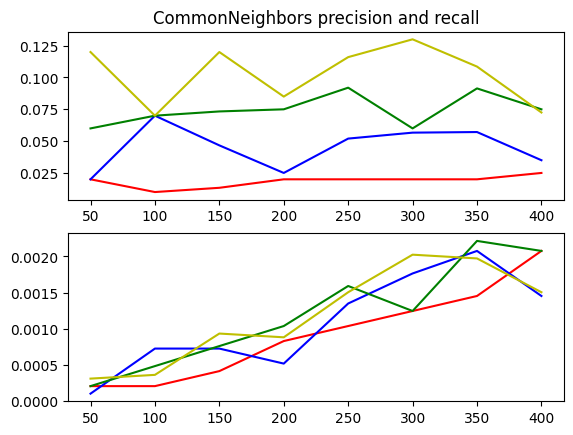

In [84]:
plt.subplot(211)
plt.title("CommonNeighbors precision and recall")
plt.plot(k_list,Pred_dict["CommonNeighbors"]["top_k"]["0.05"],'r',
         k_list,Pred_dict["CommonNeighbors"]["top_k"]["0.1"],'b',
         k_list,Pred_dict["CommonNeighbors"]["top_k"]["0.15"],'g',
         k_list,Pred_dict["CommonNeighbors"]["top_k"]["0.2"],'y',)
plt.subplot(212)
plt.plot(k_list,Pred_dict["CommonNeighbors"]["recall_k"]["0.05"],'r',
         k_list,Pred_dict["CommonNeighbors"]["recall_k"]["0.1"],'b',
         k_list,Pred_dict["CommonNeighbors"]["recall_k"]["0.15"],'g',
         k_list,Pred_dict["CommonNeighbors"]["recall_k"]["0.2"],'y',)
plt.show()

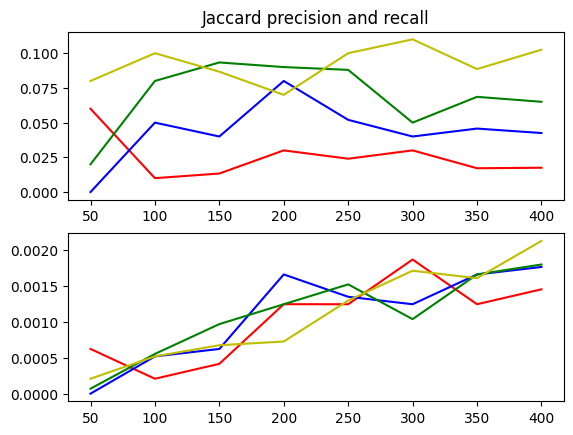

In [85]:
plt.subplot(211)
plt.title("Jaccard precision and recall")
plt.plot(k_list,Pred_dict["Jaccard"]["top_k"]["0.05"],'r',
         k_list,Pred_dict["Jaccard"]["top_k"]["0.1"],'b',
         k_list,Pred_dict["Jaccard"]["top_k"]["0.15"],'g',
         k_list,Pred_dict["Jaccard"]["top_k"]["0.2"],'y',)
plt.subplot(212)
plt.plot(k_list,Pred_dict["Jaccard"]["recall_k"]["0.05"],'r',
         k_list,Pred_dict["Jaccard"]["recall_k"]["0.1"],'b',
         k_list,Pred_dict["Jaccard"]["recall_k"]["0.15"],'g',
         k_list,Pred_dict["Jaccard"]["recall_k"]["0.2"],'y',)
plt.show()

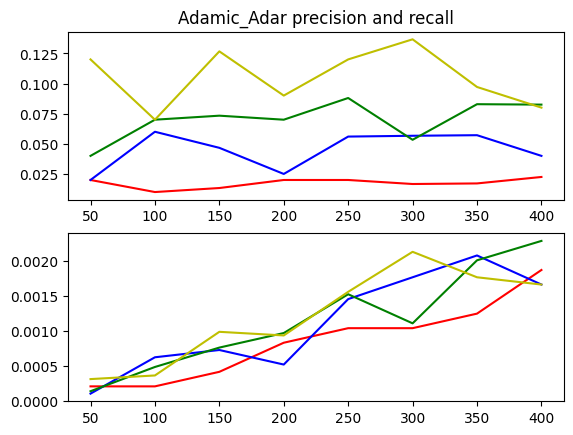

In [86]:
plt.subplot(211)
plt.title("Adamic_Adar precision and recall")
plt.plot(k_list,Pred_dict["Adamic_Adar"]["top_k"]["0.05"],'r',
         k_list,Pred_dict["Adamic_Adar"]["top_k"]["0.1"],'b',
         k_list,Pred_dict["Adamic_Adar"]["top_k"]["0.15"],'g',
         k_list,Pred_dict["Adamic_Adar"]["top_k"]["0.2"],'y',)
plt.subplot(212)
plt.plot(k_list,Pred_dict["Adamic_Adar"]["recall_k"]["0.05"],'r',
         k_list,Pred_dict["Adamic_Adar"]["recall_k"]["0.1"],'b',
         k_list,Pred_dict["Adamic_Adar"]["recall_k"]["0.15"],'g',
         k_list,Pred_dict["Adamic_Adar"]["recall_k"]["0.2"],'y',)
plt.show()

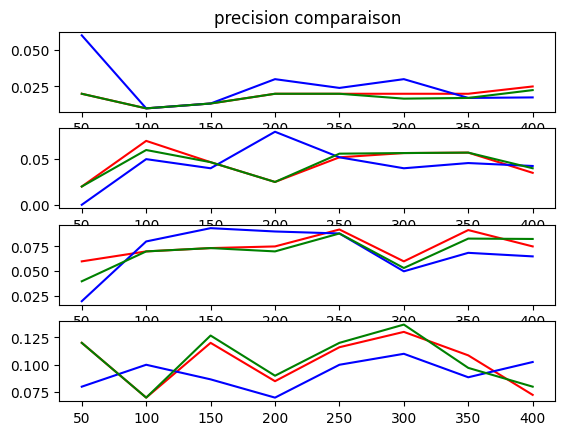

In [87]:
plt.subplot(411)
plt.title("precision comparaison")
plt.plot(k_list,Pred_dict["CommonNeighbors"]["top_k"]["0.05"],'r',
         k_list,Pred_dict["Jaccard"]["top_k"]["0.05"],'b',
         k_list,Pred_dict["Adamic_Adar"]["top_k"]["0.05"],'g')
plt.subplot(412)
plt.plot(k_list,Pred_dict["CommonNeighbors"]["top_k"]["0.1"],'r',
         k_list,Pred_dict["Jaccard"]["top_k"]["0.1"],'b',
         k_list,Pred_dict["Adamic_Adar"]["top_k"]["0.1"],'g')
plt.subplot(413)
plt.plot(k_list,Pred_dict["CommonNeighbors"]["top_k"]["0.15"],'r',
         k_list,Pred_dict["Jaccard"]["top_k"]["0.15"],'b',
         k_list,Pred_dict["Adamic_Adar"]["top_k"]["0.15"],'g')
plt.subplot(414)
plt.plot(k_list,Pred_dict["CommonNeighbors"]["top_k"]["0.2"],'r',
         k_list,Pred_dict["Jaccard"]["top_k"]["0.2"],'b',
         k_list,Pred_dict["Adamic_Adar"]["top_k"]["0.2"],'g')
plt.show()

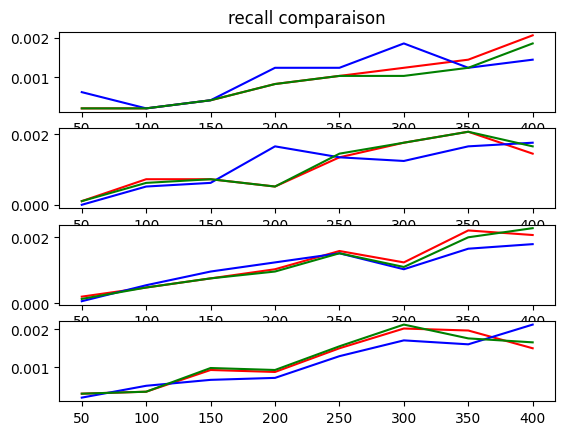

In [88]:
plt.subplot(411)
plt.title("recall comparaison")
plt.plot(k_list,Pred_dict["CommonNeighbors"]["recall_k"]["0.05"],'r',
         k_list,Pred_dict["Jaccard"]["recall_k"]["0.05"],'b',
         k_list,Pred_dict["Adamic_Adar"]["recall_k"]["0.05"],'g')
plt.subplot(412)
plt.plot(k_list,Pred_dict["CommonNeighbors"]["recall_k"]["0.1"],'r',
         k_list,Pred_dict["Jaccard"]["recall_k"]["0.1"],'b',
         k_list,Pred_dict["Adamic_Adar"]["recall_k"]["0.1"],'g')
plt.subplot(413)
plt.plot(k_list,Pred_dict["CommonNeighbors"]["recall_k"]["0.15"],'r',
         k_list,Pred_dict["Jaccard"]["recall_k"]["0.15"],'b',
         k_list,Pred_dict["Adamic_Adar"]["recall_k"]["0.15"],'g')
plt.subplot(414)
plt.plot(k_list,Pred_dict["CommonNeighbors"]["recall_k"]["0.2"],'r',
         k_list,Pred_dict["Jaccard"]["recall_k"]["0.2"],'b',
         k_list,Pred_dict["Adamic_Adar"]["recall_k"]["0.2"],'g')
plt.show()